In [8]:
from google.colab import files
uploaded = files.upload() 

for fn in uploaded.keys(): 
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving test1.png to test1.png
User uploaded file "test1.png" with length 8956 bytes


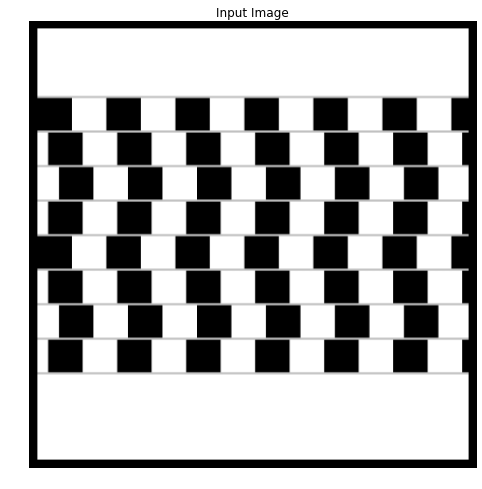

In [9]:
from IPython.display import Image
Image('test1.png')

Populating the interactive namespace from numpy and matplotlib


(-0.5, 481.5, 488.5, -0.5)

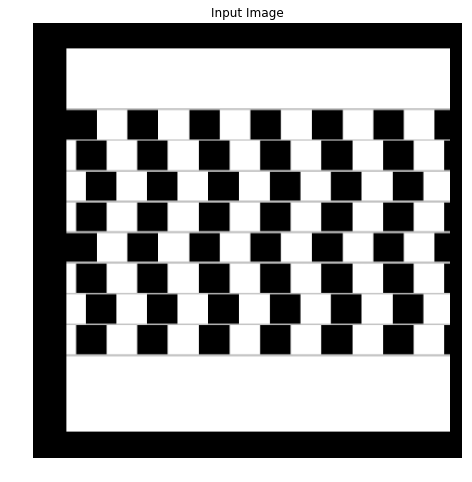

In [11]:
%pylab inline

import cv2

pylab.rcParams['figure.figsize'] = (8.0, 8.0)

im = cv2.imread('test1.png')

im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
imshow(im)
title('Input Image')
axis('off')

(-0.5, 481.5, 488.5, -0.5)

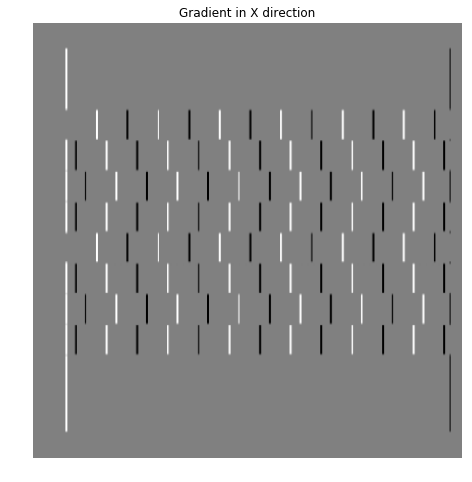

In [13]:
i_x = cv2.Sobel(im_gray, cv2.CV_64F, 1, 0)
imshow(i_x, cmap=gray())
title('Gradient in X direction')
axis('off')

(-0.5, 481.5, 488.5, -0.5)

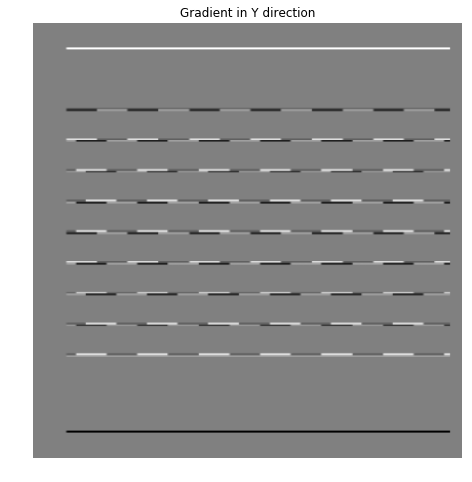

In [14]:
i_y = cv2.Sobel(im_gray, cv2.CV_64F, 0, 1)
imshow(i_y, cmap=gray())
title('Gradient in Y direction')
axis('off')

(-0.5, 481.5, 488.5, -0.5)

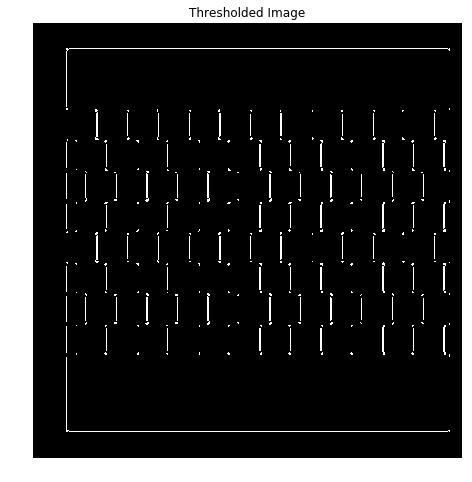

In [15]:
i_xx = multiply(i_x, i_x)
i_xy = multiply(i_x, i_y)
i_yy = multiply(i_y, i_y)

s_xx = cv2.GaussianBlur(i_xx, (5,5), 0)
s_xy = cv2.GaussianBlur(i_xy, (5,5), 0)
s_yy = cv2.GaussianBlur(i_yy, (5,5), 0)

k = .04 
det_h = multiply(s_xx, s_yy) - multiply(s_xy, s_xy)
trace_h = s_xx + s_yy
R = det_h - k*multiply(trace_h, trace_h)


ratio = .2 
thresh = abs(R) > ratio * abs(R).max()
imshow(thresh, cmap=gray())
title('Thresholded Image')
axis('off')

In [16]:
non_zero_cords = np.nonzero(thresh)


tuple_cords = [(i, j) for i,j in zip(non_zero_cords[0], non_zero_cords[1])] 

values = [abs(R)[i, j] for i, j in tuple_cords]

sorted_cords = [tuple_cords[i] for i in argsort(values)[::-1]]

distance = 10 

nms_cords = []
nms_cords.append(sorted_cords[0])
for cord in sorted_cords:
    for nms_cord in nms_cords:
        if abs(cord[0]-nms_cord[0]) < distance and abs(cord[1]-nms_cord[1]) < distance:
            break
    else:
        nms_cords.append(cord)
print "Number of points detected before NMS = {} ".format(sum(thresh))
print "Number of points detected after NMS = {} ".format(len(nms_cords))

Number of points detected before NMS = 5680 
Number of points detected after NMS = 424 


(-0.5, 481.5, 488.5, -0.5)

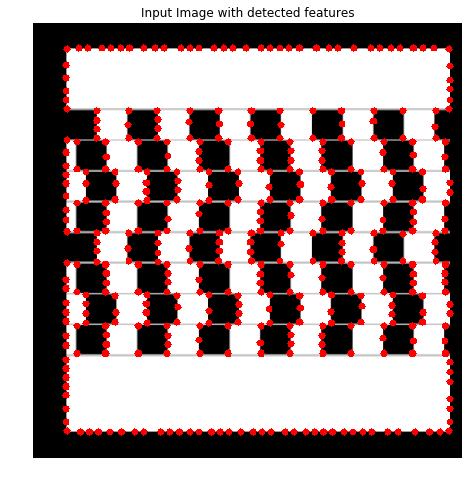

In [17]:
for nms_cord in nms_cords:
    cv2.circle(im, (nms_cord[1], nms_cord[0]), 4, (0, 0, 255), -1)
imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
title('Input Image with detected features')
axis('off')